In [50]:
# pip install nltk

In [51]:
# pip install wordcloud

In [52]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords,wordnet
from wordcloud import WordCloud , STOPWORDS
import warnings
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

warnings.filterwarnings('ignore')
%matplotlib inline

In [53]:
df = pd.read_csv("tweet.csv")

In [54]:
df=df.sample(5000)

In [55]:
df.shape

(5000, 2)

In [56]:
df.head()

,tweets,class
74152,These convos are just the best.\n#grindr #sarc...,sarcasm
32778,@shelby_hammel @femaIes this just happened #ir...,irony
75395,I just love how you can still get under my ski...,sarcasm
51277,yet again the authorities have taken a clueles...,regular
55178,"My book on methamphetamine, at Amazon http://t...",regular


In [58]:
# df["tweets"][0]

In [59]:
df["class"].value_counts()

class
sarcasm       1337
figurative    1285
irony         1263
regular       1115
Name: count, dtype: int64

# checking null value

In [60]:
df.isna().sum()

tweets    0
class     0
dtype: int64

In [61]:
df.duplicated().sum()

0

In [62]:
df.drop_duplicates(inplace=True)

In [63]:
df.duplicated().sum()

0

In [64]:
df[df["tweets"].duplicated()]

,tweets,class
16644,@uspo16 @Fake_Andrew @Coeleborn @ScientiaPerce...,figurative
33915,Oh the irony #ironic #avfc #delph by robstar_2...,irony
3086,"@kandiappl6 ""I'm a democrat- I'm already educa...",figurative
41008,@MartinShkreli #martinshkreli couldn't handle ...,irony
34565,Sometimes I feel like I can pass out quicker i...,irony
4836,I might be kicked out of my apartment by the e...,figurative
14460,Well how about that 😂 #irony #SEAvsSTL,figurative
7146,I love it how I am always out of the loop abou...,figurative
1731,@CutonDime25 ur a joke! Glad ur not in philly ...,figurative
72070,@Barnacules Which worked out sooooo well for V...,sarcasm


In [65]:
13362/81408*100

16.41362028301887

16% data are duplicated which is greater than 10% we cannot remove

In [66]:
df.describe()

,tweets,class
count,5000,5000
unique,4944,4
top,Stock market is really doing well #sarcasm,sarcasm
freq,2,1337


# Data Cleaning 

In [67]:
def clean_text(text):
    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # Remove links
    text = re.sub(r'http\S+', '', text)
    
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove non-english alphabets
    text = ''.join([i for i in text if i.isalpha() or i.isspace()])

    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove stopwords and lemmatize the remaining words
    lemma= WordNetLemmatizer()

    tokens = [lemma.lemmatize(i) for i in tokens if not i in stopwords.words('english')]
    
    # Join the tokens back into a string
    text = ' '.join(tokens)

    return text


In [68]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [70]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [71]:
df["tweets"]= df["tweets"].apply(clean_text)

In [72]:
text=[]
index=[]

for i,j in enumerate(df['tweets']):
    # texts=clean_text(i)
    text.append(j)
    index.append(i)

In [73]:
text

['convos best grindr sarcasm',
 'shelbyhammel femaies happened ironic sister sibling',
 'love still get skin sarcasm',
 'yet authority taken clueless approach warondrugs via mixmag drug police nightclub',
 'book methamphetamine amazon chapter meth natehendley drug crystalmeth',
 'saudiarabia head un panel human right behead alimohammedalnimr practicing human right irony',
 'something ad block pushing notification doesnt seem right irony',
 'art caplan amp mary holland discus vaccine roy green show hearus gopdebate',
 'kid wondered didnt learn history know liar make sense cuz civil war wasnt slavery sarcasm',
 'dustinlong he really matured sarcasm',
 'ohfarq pissantpartisan guardian journalism finest sarcasm maajidnawaz',
 'lancezierlein saying there chance sarcasm',
 'long looking feel whole partner really ready partner irony wisdom',
 'texas armadillo basket rattlesnake mouse trap miz mike amp murder mystery romance humor bridge beyond betrayal',
 'sleep night comic humor',
 'timothys

In [75]:
# df['tweets'][0]

In [76]:
clean_text("Be aware  dirty step to get money  #staylight #staywhite  #sarcastic #moralneeded @… https://t.co/Oj6BdyX3WG'")

'aware dirty step get money staylight staywhite sarcastic moralneeded'

In [78]:
# df["tweets"][0]

In [79]:
df.head()

,tweets,class
74152,convos best grindr sarcasm,sarcasm
32778,shelbyhammel femaies happened ironic sister si...,irony
75395,love still get skin sarcasm,sarcasm
51277,yet authority taken clueless approach warondru...,regular
55178,book methamphetamine amazon chapter meth nateh...,regular


# Visualization

In [80]:
df["class"].value_counts()

class
sarcasm       1337
figurative    1285
irony         1263
regular       1115
Name: count, dtype: int64

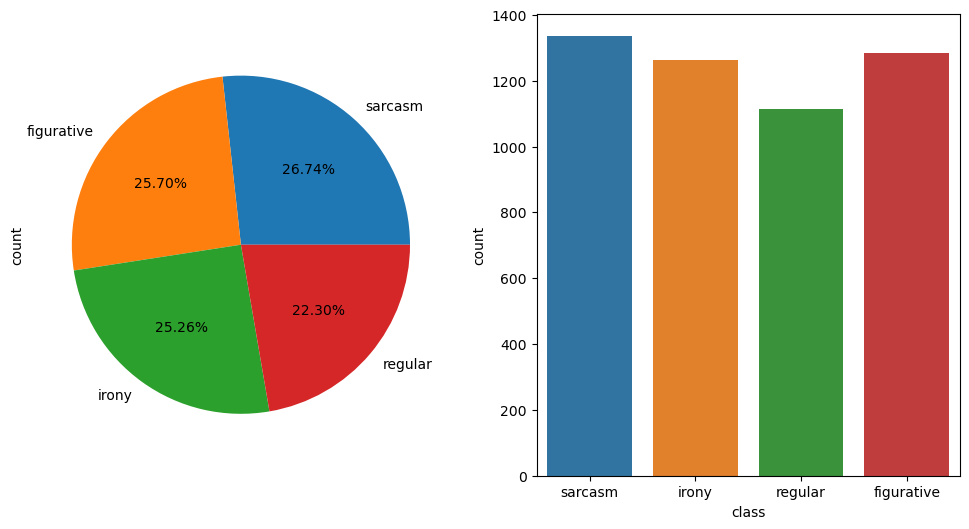

In [81]:
plt.rcParams['figure.figsize']=(12,6)
[plt.subplot(1,2,1),df["class"].value_counts().plot(kind ='pie',autopct = '%0.2f%%') ]
[plt.subplot(1,2,2),sns.countplot(data=df,x='class')]
plt.show()

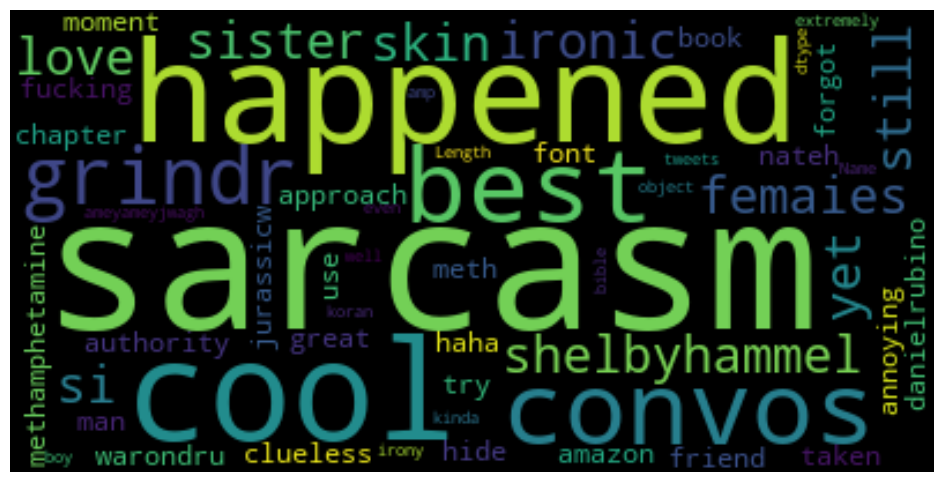

In [82]:
wc = WordCloud(stopwords=STOPWORDS,
    background_color='black', mode='RGB').generate(str(df["tweets"]))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [83]:
figurative = df[df['class']=='figurative']
irony = df[df['class']=='irony']
sarcasm = df[df['class']=='sarcasm']
regular = df[df['class']=='regular']

In [84]:
def wordcl(data,title):
    stop = STOPWORDS
    wc = WordCloud(background_color='black',stopwords=stop).generate(data)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(title)

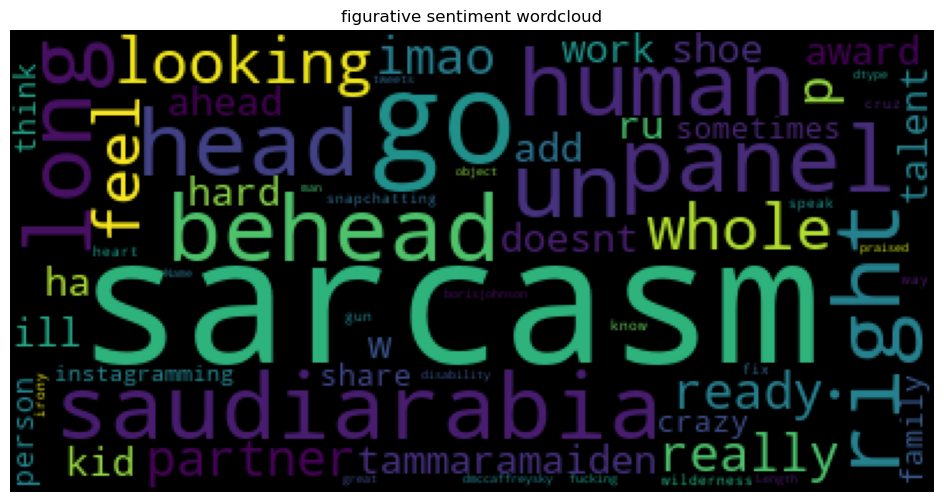

In [85]:
wordcl(str(figurative['tweets']),'figurative sentiment wordcloud')

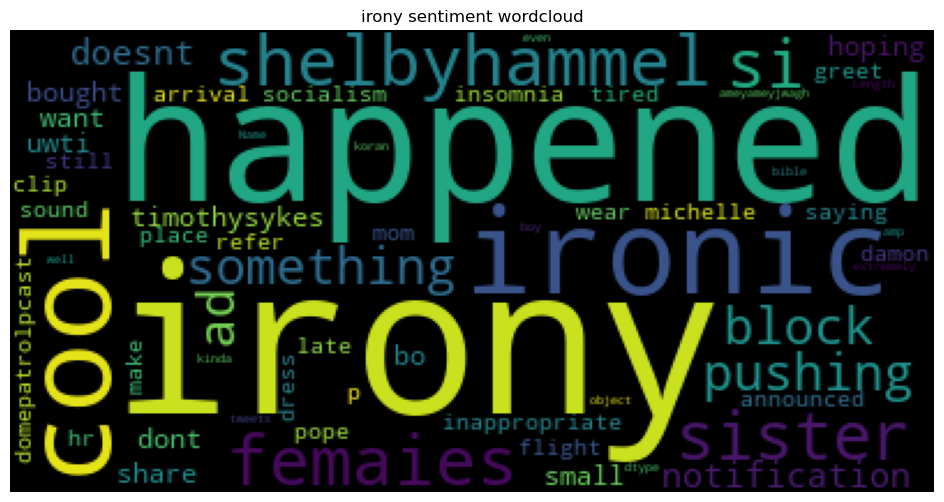

In [86]:
wordcl(str(irony['tweets']),'irony sentiment wordcloud')

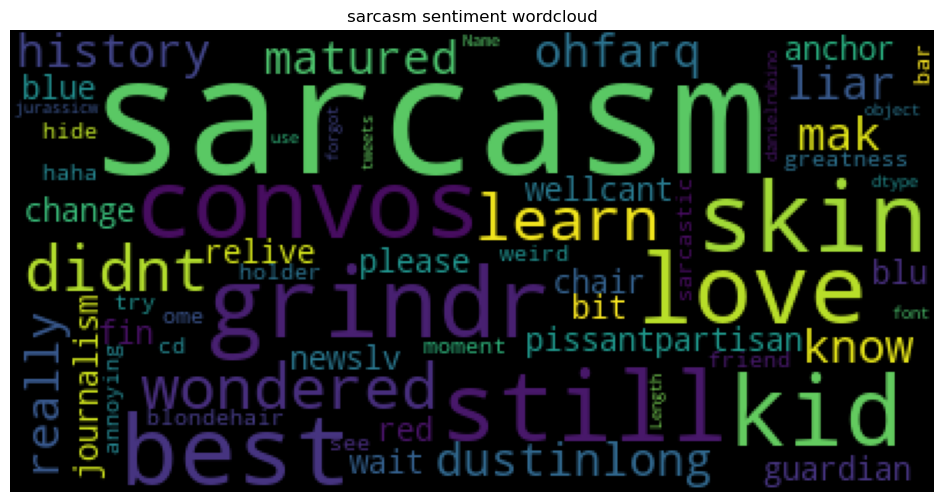

In [87]:
wordcl(str(sarcasm['tweets']),'sarcasm sentiment wordcloud')

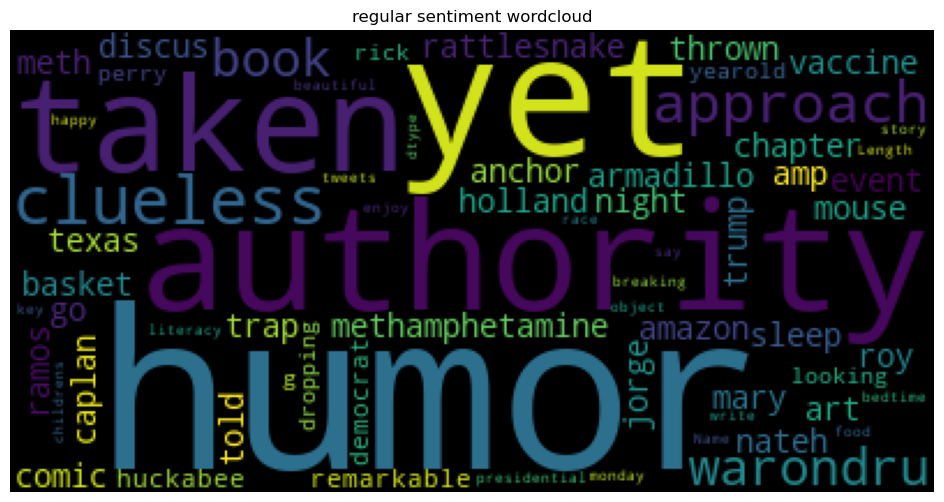

In [88]:
wordcl(str(regular['tweets']),'regular sentiment wordcloud')

In [89]:
#No. of words
df['length'] = df['tweets'].apply(lambda x:len(nltk.word_tokenize(x)))

In [90]:
df

,tweets,class,length
74152,convos best grindr sarcasm,sarcasm,4
32778,shelbyhammel femaies happened ironic sister si...,irony,6
75395,love still get skin sarcasm,sarcasm,5
51277,yet authority taken clueless approach warondru...,regular,11
55178,book methamphetamine amazon chapter meth nateh...,regular,8
...,...,...,...
9533,great fucking man sarcasm,figurative,4
66038,moment try hide annoying friend haha jurassicw...,sarcasm,8
71164,danielrubino forgot use sarcasm font,sarcasm,5
36872,ameyameyjwagh kinda cool extremely cool boy am...,irony,10


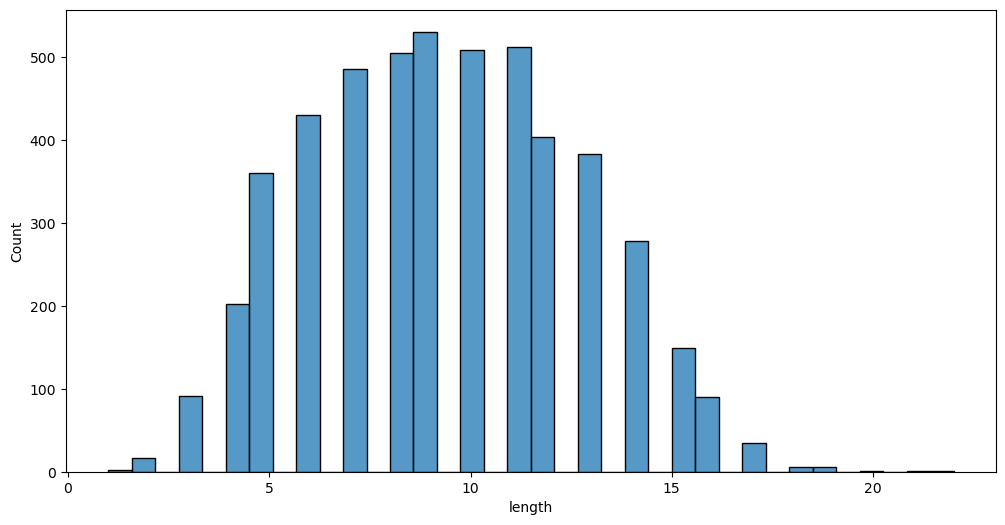

In [91]:
sns.histplot(df['length'])
plt.show()

this way of analysis is not showing any proper result.

In [92]:
df['lable'] = df['class'].map({'figurative':3,'irony':2,'sarcasm':1,'regular':0})

In [93]:
df

,tweets,class,length,lable
74152,convos best grindr sarcasm,sarcasm,4,1
32778,shelbyhammel femaies happened ironic sister si...,irony,6,2
75395,love still get skin sarcasm,sarcasm,5,1
51277,yet authority taken clueless approach warondru...,regular,11,0
55178,book methamphetamine amazon chapter meth nateh...,regular,8,0
...,...,...,...,...
9533,great fucking man sarcasm,figurative,4,3
66038,moment try hide annoying friend haha jurassicw...,sarcasm,8,1
71164,danielrubino forgot use sarcasm font,sarcasm,5,1
36872,ameyameyjwagh kinda cool extremely cool boy am...,irony,10,2


# Model Building

In [95]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from nltk.tokenize import word_tokenize
from sklearn.model_selection import GridSearchCV, KFold
from gensim.models import Word2Vec
from sklearn.svm import SVC

In [97]:
# pip install xgboost

# Taking sample data

In [99]:
min_sample = 1000

df_figurative = df[df['class']=="figurative"].sample(min_sample,random_state=42)
df_irony = df[df['class']=="irony"].sample(min_sample,random_state=42)
df_regular = df[df['class']=="regular"].sample(min_sample,random_state=42)
df_sarcasm = df[df['class']=="sarcasm"].sample(min_sample,random_state=42)

In [100]:
df_balence = pd.concat([df_figurative,df_irony,df_regular,df_sarcasm],axis = 0)
df_balence['class'].value_counts()

class
figurative    1000
irony         1000
regular       1000
sarcasm       1000
Name: count, dtype: int64

In [101]:
X = df_balence['tweets']
Y = df_balence['lable']

# TF-IDF Uni-gram

In [102]:
def predict(model):
    model = model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    trainac = model.score(xtrain, ytrain)
    testac = model.score(xtest, ytest)
    
    print(f"Train accuracy {trainac}\nTest accuracy {testac}")
    
    print(classification_report(ytest, ypred))

In [103]:
tf =  TfidfVectorizer(ngram_range=(1,1))
x = tf.fit_transform(df_balence['tweets'])

#x = pd.DataFrame(x.toarray(), columns=tf.get_feature_names_out())
y = df_balence['lable']

In [104]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.35,random_state=1)

In [105]:
predict(AdaBoostClassifier())

Train accuracy 0.3792307692307692
Test accuracy 0.38357142857142856
              precision    recall  f1-score   support

           0       0.40      1.00      0.57       353
           1       0.55      0.05      0.09       332
           2       0.00      0.00      0.00       356
           3       0.35      0.47      0.40       359

    accuracy                           0.38      1400
   macro avg       0.32      0.38      0.27      1400
weighted avg       0.32      0.38      0.27      1400



In [106]:
predict(GradientBoostingClassifier())

Train accuracy 0.8407692307692308
Test accuracy 0.725
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       353
           1       0.65      0.94      0.77       332
           2       0.66      0.92      0.77       356
           3       0.31      0.06      0.10       359

    accuracy                           0.73      1400
   macro avg       0.66      0.73      0.66      1400
weighted avg       0.65      0.72      0.66      1400



In [107]:
predict(DecisionTreeClassifier())

Train accuracy 0.9957692307692307
Test accuracy 0.6771428571428572
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       353
           1       0.65      0.77      0.71       332
           2       0.65      0.72      0.68       356
           3       0.32      0.23      0.26       359

    accuracy                           0.68      1400
   macro avg       0.65      0.68      0.66      1400
weighted avg       0.65      0.68      0.66      1400



In [108]:
predict(RandomForestClassifier())

Train accuracy 0.9957692307692307
Test accuracy 0.7335714285714285
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       353
           1       0.65      0.98      0.78       332
           2       0.67      0.96      0.79       356
           3       0.29      0.02      0.03       359

    accuracy                           0.73      1400
   macro avg       0.64      0.74      0.65      1400
weighted avg       0.64      0.73      0.64      1400



In [109]:
predict(SVC())

Train accuracy 0.9915384615384616
Test accuracy 0.7357142857142858
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       353
           1       0.65      0.99      0.79       332
           2       0.66      0.96      0.79       356
           3       0.26      0.01      0.03       359

    accuracy                           0.74      1400
   macro avg       0.64      0.74      0.65      1400
weighted avg       0.64      0.74      0.64      1400



In [110]:
predict(MultinomialNB())

Train accuracy 0.9796153846153847
Test accuracy 0.6385714285714286
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       353
           1       0.61      0.79      0.69       332
           2       0.64      0.61      0.62       356
           3       0.34      0.27      0.30       359

    accuracy                           0.64      1400
   macro avg       0.63      0.64      0.63      1400
weighted avg       0.63      0.64      0.63      1400



# CountVectorizer Uni-Gram

In [111]:
vc =  CountVectorizer(ngram_range=(1,1))
X = vc.fit_transform(df_balence['tweets'])

#x = pd.DataFrame(x.toarray(), columns=tf.get_feature_names_out())
Y = df_balence['lable']

In [112]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.35,random_state=1)

In [113]:
predict(AdaBoostClassifier())

Train accuracy 0.3792307692307692
Test accuracy 0.38357142857142856
              precision    recall  f1-score   support

           0       0.40      1.00      0.57       353
           1       0.55      0.05      0.09       332
           2       0.00      0.00      0.00       356
           3       0.35      0.47      0.40       359

    accuracy                           0.38      1400
   macro avg       0.32      0.38      0.27      1400
weighted avg       0.32      0.38      0.27      1400



In [114]:
predict(GradientBoostingClassifier())

Train accuracy 0.8123076923076923
Test accuracy 0.7264285714285714
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       353
           1       0.64      0.96      0.77       332
           2       0.66      0.94      0.78       356
           3       0.23      0.03      0.05       359

    accuracy                           0.73      1400
   macro avg       0.63      0.73      0.65      1400
weighted avg       0.63      0.73      0.65      1400



In [115]:
predict(DecisionTreeClassifier())

Train accuracy 0.9957692307692307
Test accuracy 0.7028571428571428
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       353
           1       0.65      0.84      0.73       332
           2       0.66      0.81      0.73       356
           3       0.34      0.18      0.23       359

    accuracy                           0.70      1400
   macro avg       0.66      0.71      0.67      1400
weighted avg       0.66      0.70      0.67      1400



In [116]:
predict(RandomForestClassifier())

Train accuracy 0.9953846153846154
Test accuracy 0.7335714285714285
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       353
           1       0.65      0.98      0.78       332
           2       0.67      0.96      0.79       356
           3       0.29      0.02      0.03       359

    accuracy                           0.73      1400
   macro avg       0.64      0.74      0.65      1400
weighted avg       0.64      0.73      0.64      1400



In [117]:
predict(SVC())

Train accuracy 0.9238461538461539
Test accuracy 0.7414285714285714
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       353
           1       0.65      1.00      0.79       332
           2       0.67      0.99      0.80       356
           3       0.00      0.00      0.00       359

    accuracy                           0.74      1400
   macro avg       0.58      0.75      0.65      1400
weighted avg       0.57      0.74      0.64      1400



In [118]:
predict(MultinomialNB())

Train accuracy 0.9730769230769231
Test accuracy 0.6721428571428572
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       353
           1       0.63      0.80      0.71       332
           2       0.67      0.71      0.69       356
           3       0.35      0.26      0.30       359

    accuracy                           0.67      1400
   macro avg       0.66      0.68      0.66      1400
weighted avg       0.66      0.67      0.66      1400



# as naive bays give good accuracy as compare to other model's we go for naive bays (countvectorizer)

# Pipeline

In [119]:
df.head()

,tweets,class,length,lable
74152,convos best grindr sarcasm,sarcasm,4,1
32778,shelbyhammel femaies happened ironic sister si...,irony,6,2
75395,love still get skin sarcasm,sarcasm,5,1
51277,yet authority taken clueless approach warondru...,regular,11,0
55178,book methamphetamine amazon chapter meth nateh...,regular,8,0


In [120]:
df.shape

(5000, 4)

In [179]:
df

,tweets,class,length,lable
74152,convos best grindr sarcasm,sarcasm,4,1
32778,shelbyhammel femaies happened ironic sister si...,irony,6,2
75395,love still get skin sarcasm,sarcasm,5,1
51277,yet authority taken clueless approach warondru...,regular,11,0
55178,book methamphetamine amazon chapter meth nateh...,regular,8,0
...,...,...,...,...
9533,great fucking man sarcasm,figurative,4,3
66038,moment try hide annoying friend haha jurassicw...,sarcasm,8,1
71164,danielrubino forgot use sarcasm font,sarcasm,5,1
36872,ameyameyjwagh kinda cool extremely cool boy am...,irony,10,2


In [190]:
vc =  CountVectorizer(ngram_range=(1,1))
X = vc.fit_transform(df['tweets'])
Y = df['lable']

In [191]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.35,random_state=42)

In [192]:
Y_train.value_counts()

lable
1    891
2    815
3    811
0    733
Name: count, dtype: int64

In [193]:
X_train

<3250x13463 sparse matrix of type '<class 'numpy.int64'>'
	with 29535 stored elements in Compressed Sparse Row format>

In [194]:
Model_multinominal = MultinomialNB(alpha=2)

In [195]:
Model_multinominal.fit(X_train, Y_train)       # Train model using pipeline
y_pred = Model_multinominal.predict(X_test)   # Evaluate model on testing set
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       382
           1       0.63      0.87      0.73       446
           2       0.65      0.75      0.70       448
           3       0.32      0.16      0.21       474

    accuracy                           0.67      1750
   macro avg       0.65      0.69      0.65      1750
weighted avg       0.63      0.67      0.64      1750



In [196]:
y_pred

array([3, 0, 2, ..., 1, 1, 1], dtype=int64)

In [197]:
a=['Be aware  dirty step to get money  #staylight #staywhite  #sarcastic #moralneeded @… https://t.co/Oj6BdyX3WG']

In [198]:
a_transform=vc.fit_transform(a)

In [199]:
Model_multinominal.predict(a_transform)

ValueError: X has 14 features, but MultinomialNB is expecting 13463 features as input.

In [171]:
y_pred

array([3, 0, 2, ..., 1, 1, 1], dtype=int64)

In [145]:
print("Train_Accuracy :",Model_multinominal.score(X_train,Y_train))
print('Test_Accuracy :',Model_multinominal.score(X_test,Y_test))

Train_Accuracy : 0.9316923076923077
Test_Accuracy : 0.6685714285714286


# Pipeline

In [127]:
x1 = df['tweets']
Y1 = df['lable']

In [128]:
Xtrain,Xtest,Ytrain,Ytest= train_test_split(x1,Y1,test_size=0.34,random_state=42)

In [154]:
# def clean(text):
#     text = re.sub(r'[^\w\s]', '', text)
#     text = re.sub(r'http\S+', '', text)
#     text = text.lower()
#     text = re.sub(r'\d+', '', text)
#     text = ''.join([i for i in text if i.isalpha() or i.isspace()])
#     tokens = nltk.word_tokenize(text)
#     lemma= WordNetLemmatizer()
#     tokens = [lemma.lemmatize(i) for i in tokens if not i in stopwords.words('english')]
#     text = ' '.join(tokens)
#     print(text)

#     return text

In [200]:
with open('cleaner.pkl','wb') as file:
    pickle.dump(clean,file)

In [162]:
model = Pipeline([
    ('CV', CountVectorizer(lowercase=True)),
    ('model', Model_multinominal)
])

In [163]:
model.fit(Xtrain,Ytrain)

Pipeline(steps=[('CV', CountVectorizer()), ('model', MultinomialNB(alpha=2))])

# Model Saving 

In [164]:
import pickle

In [165]:
pickle.dump(model, open('model.pkl','wb'))

In [166]:
with open('model.pkl','wb') as file:
    pickle.dump(model,file)

In [201]:
with open('cleaner.pkl','rb') as file:
    cleaner=pickle.load(file)     #Saved Pickle file for dimployments

In [169]:
# Be aware  dirty step to get money  #staylight #staywhite  #sarcastic #moralneeded @… https://t.co/Oj6BdyX3WG'

In [203]:
a="Be aware  dirty step to get money  #staylight #staywhite  #sarcastic #moralneeded @… https://t.co/Oj6BdyX3WG'"

In [204]:
cleaner(a)

aware dirty step get money staylight staywhite sarcastic moralneeded


'aware dirty step get money staylight staywhite sarcastic moralneeded'

In [170]:
model.predict_proba(a)

ValueError: Iterable over raw text documents expected, string object received.